# CODECLAUSE DATA SCIENCE INTERSHIP PROGRAM



---


**AUTHOR - Nikhil Eshwar T**



**TASK 1 - Color Detection**

Importing Necessary Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import json
import plotly.express as px
import os
from PIL import Image
import xgboost as xgb
from mpl_toolkits import mplot3d
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

Accessing Data from Kaggle API

In [ ]:
#Open and read the JSON file
with open('kaggle (1).json', 'r') as json_file:
    data = json.load(json_file)

#Access specific values from the loaded JSON data
username = data['username']
key= data['key']

In [ ]:
os.environ['KAGGLE_USERNAME'] =username
os.environ['KAGGLE_KEY'] =key

Downloading the Dataset

In [ ]:
!kaggle datasets download -d adikurniawan/color-dataset-for-color-recognition --force

  0% 0.00/6.84M [00:00<?, ?B/s]
100% 6.84M/6.84M [00:00<00:00, 267MB/s]


In [ ]:
!unzip color-dataset-for-color-recognition.zip

Archive:  color-dataset-for-color-recognition.zip
  inflating: training_dataset/black/0a0502.png  
  inflating: training_dataset/black/110011.png  
  inflating: training_dataset/black/1d1817.png  
  inflating: training_dataset/black/black1.png  
  inflating: training_dataset/black/black10.png  
  inflating: training_dataset/black/black11.png  
  inflating: training_dataset/black/black12.png  
  inflating: training_dataset/black/black13.png  
  inflating: training_dataset/black/black14.png  
  inflating: training_dataset/black/black15.png  
  inflating: training_dataset/black/black16.png  
  inflating: training_dataset/black/black17.png  
  inflating: training_dataset/black/black18.png  
  inflating: training_dataset/black/black19-.png  
  inflating: training_dataset/black/black2.jpg  
  inflating: training_dataset/black/black20.png  
  inflating: training_dataset/black/black21.jpg  
  inflating: training_dataset/black/black22.png  
  inflating: training_dataset/black/black3.png  
  inf

Displaying Sample Images from the Dataset

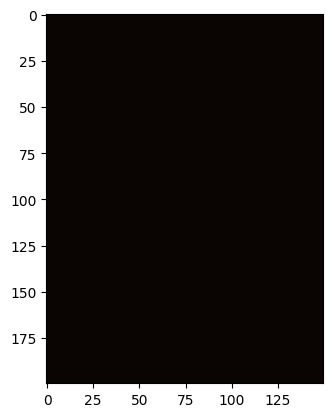

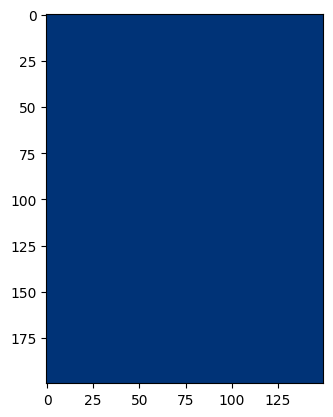

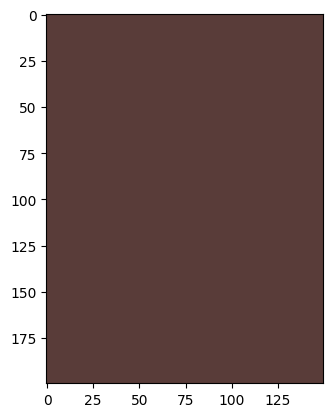

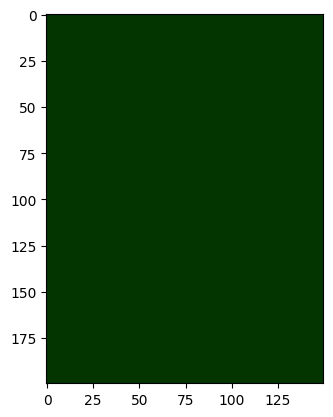

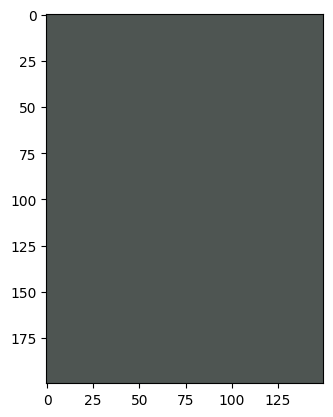

In [ ]:
image_paths = ['color_dataset/training_dataset/black/0a0502.png', 'color_dataset/training_dataset/blue/003377.png', 'color_dataset/training_dataset/brown/593c39.png','color_dataset/training_dataset/green/033500.png','color_dataset/training_dataset/grey/4e5552.png']

# Display the images
for image_path in image_paths:
    img = Image.open(image_path)
    plt.imshow(img)
    plt.show()

We can extract the RGB format for every image and its corresponding color in a seperate DataFrame by using CV to detect the RGB values of the Image

In [ ]:
rgb = []
color = []

for dirname, _, filenames in os.walk('color_dataset/training_dataset'):
    for filename in filenames:
        image = cv2.cvtColor(cv2.imread(os.path.join(dirname, filename)), cv2.COLOR_BGR2RGB)
        rgb.append(image[0][0])
        extracted_color = dirname.split('/')[-1]
        color.append(extracted_color)
        print(f"Directory: {dirname}, Extracted Color: {extracted_color}")

Directory: color_dataset/training_dataset/yellow, Extracted Color: yellow
Directory: color_dataset/training_dataset/yellow, Extracted Color: yellow
Directory: color_dataset/training_dataset/yellow, Extracted Color: yellow
Directory: color_dataset/training_dataset/yellow, Extracted Color: yellow
Directory: color_dataset/training_dataset/yellow, Extracted Color: yellow
Directory: color_dataset/training_dataset/yellow, Extracted Color: yellow
Directory: color_dataset/training_dataset/yellow, Extracted Color: yellow
Directory: color_dataset/training_dataset/yellow, Extracted Color: yellow
Directory: color_dataset/training_dataset/yellow, Extracted Color: yellow
Directory: color_dataset/training_dataset/yellow, Extracted Color: yellow
Directory: color_dataset/training_dataset/yellow, Extracted Color: yellow
Directory: color_dataset/training_dataset/yellow, Extracted Color: yellow
Directory: color_dataset/training_dataset/yellow, Extracted Color: yellow
Directory: color_dataset/training_data

RGB Dataframe

In [ ]:
df_rgb = pd.DataFrame(np.array(rgb), columns=['red', 'green', 'blue'])

In [ ]:
df_rgb.head()

,red,green,blue
0,255,255,255
1,247,224,23
2,255,255,0
3,255,227,2
4,255,166,0


In [ ]:
df_rgb.shape

(250, 3)

Color Dataframe

In [ ]:
df_color = pd.DataFrame(
    {
        'color': color
    }
)

In [ ]:
df_color.head()

,color
0,yellow
1,yellow
2,yellow
3,yellow
4,yellow


In [ ]:
df_color.shape

(250, 1)

Combining rgb and color dataframe

In [ ]:
df =df_rgb.join(df_color)
df.head()

,red,green,blue,color
0,255,255,255,yellow
1,247,224,23,yellow
2,255,255,0,yellow
3,255,227,2,yellow
4,255,166,0,yellow


Checking Null Values

In [ ]:
df.isnull().sum()

red      0
green    0
blue     0
color    0
dtype: int64

Checking Duplicate Values

In [ ]:
df.duplicated().sum()

27

In [ ]:
df=df.drop_duplicates()

In [ ]:
df.duplicated().sum()

0

Checking unique values in color column

In [ ]:
df['color'].nunique()

10

3D Scatter plot of the corresponding colors in the dataset

In [ ]:
fig = px.scatter_3d(df, x='red', y='green', z='blue', color='color', title='3D Scatter Plot')
fig.show()

In [ ]:
X = df.iloc[:, 0:3]
y= df.iloc[:, -1]

Train Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

KNN Model Creation


Selecting the K value with the highest accuracy by plotting a graph


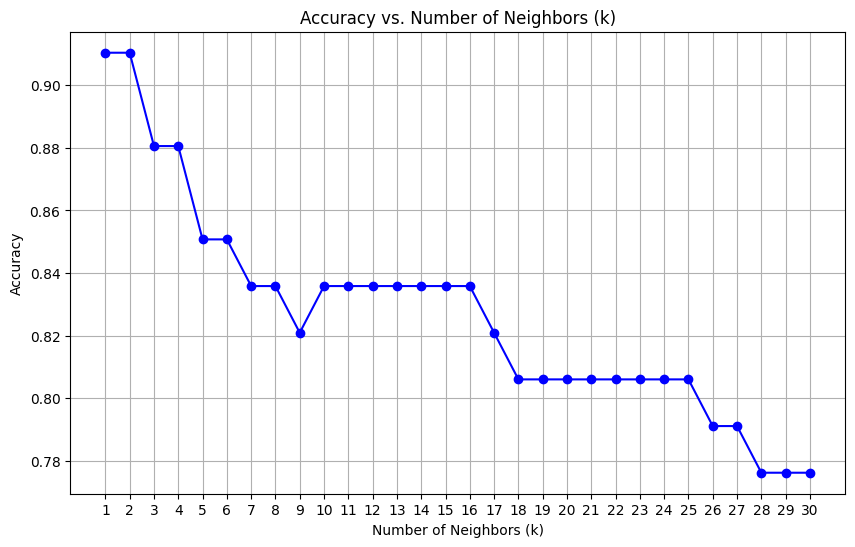

In [ ]:
k_values = range(1, 31)
accuracy_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance', metric='euclidean')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_scores, marker='o', linestyle='-', color='b')
plt.title('Accuracy vs. Number of Neighbors (k)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.xticks(k_values)
plt.show()

k=2 is chosen since it has higher accuracy

Model Building

In [ ]:
knn = KNeighborsClassifier(n_neighbors=2, weights='distance', metric='euclidean')
knn = knn.fit(X_train, y_train)

Predicting the model

In [ ]:
y_pred = knn.predict(X_test)

Accuracy

In [ ]:
accuracy_score(y_test, y_pred)

0.9104477611940298

Function for Testing the image with Custom Input

In [ ]:
def test(imagepath,model):

    img=Image.open(imagepath)
    img = Image.open(image_path)
    plt.imshow(img)
    plt.show()
    # Load the image using cv2.imread
    image = cv2.imread(imagepath)

    if image is not None:
        # Extract RGB values
        rgb_values = image[0][0]

        # Convert the RGB values into a DataFrame with feature names
        rgb_df = pd.DataFrame([rgb_values], columns=['red', 'green', 'blue'])

        # Print the RGB values
        print(f"RGB values: {rgb_df.values[0]}")

        # Use the passed KNN model for prediction
        prediction =model.predict(rgb_df)

        # Print the prediction
        print(f"Prediction: {prediction[0]}")
    else:
        print("Image not found or could not be loaded.")

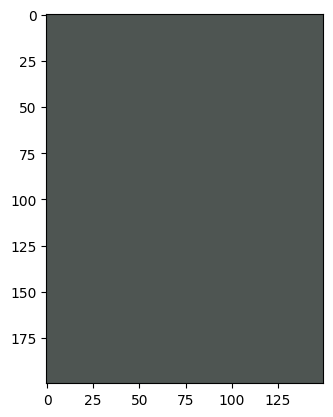

RGB values: [  0 100   0]
Prediction: green


In [ ]:
test('green.png',knn)